# Biodiversity Monitoring: Explore Phase

In this project you will use the Snapshot Karoo dataset, which is part of the [Lila BC project](https://lila.science/datasets/snapshot-karoo). This dataset contains 14889 sequences of camera trap images, totaling 38074 images.

The dataset has been annotated thanks to the contributions of volunteers using [the zooniverse.org platform](https://www.zooniverse.org/projects/shuebner729/snapshot-karoo/classify). 

The full quality Karoo dataset is 42 GB. After filtering out just the images containing animals (having deleted the images that are labelled as empty or having vehicles instead of animals), the size of the dataset is reduced to 6 GB. Furthermore, reducing the quality of each picture to around 100Kb, the dataset size is reduced to around 600 MB, such that it can fit into this lab environment. You will use this mini Karoo dataset in this project, but keep in mind the full dataset is higher resolution and contains more images. 

The steps you will complete in this lab are the following:

1. Import python packages
2. Inspect the data \
    2.1 Load the metadata \
    2.2 Look at the number of images per camera location \
    2.3 Look at the number of images per animal class 
3. Visualize the distribution of images \
    3.1 Investigate the distribution of images per animal class \
    3.2 Investigate the distribution of images per animal class for each camera location \
    3.3 Visualize images from one camera location \
    3.4 Visualize images from different camera locations \
    3.5 Inspect images that present challenges for classification

## 1. Import Python packages

Run the next cell to import the Python packages you'll need for this lab.

Note the `import utils` line. This line imports the functions that were specifically written for this lab. If you want to look at what these functions are, go to `File -> Open...` and open the `utils.py` file to have a look.

In [1]:
import pandas as pd # package for reading in and manipulating data              
import utils # utility functions for this lab

print('All packages imported successfully!')

All packages imported successfully!


## 2. Inspect the data

When dealing with images, you don't load all of them at once into memory like you might do working with a tabular dataset. In this lab, you will explore the data by retrieving images one at a time. The dataset is arranged into folders, so that the folder name indicates the class of the animal that is in the images within the folder. You can see the list of folders by running the cell below.

In [2]:
# Print out the contents of the "data" folder
!ls data

baboon		foxcape		   meerkatsuricate	  rhinocerosblack
birdother	gemsbokoryx	   mongoosesmallcapegrey  springbok
birdsofprey	hare		   mongooseyellow	  steenbok
bustardkori	hartebeestred	   monkeyvervet		  tortoise
bustardludwigs	hyenabrown	   ostrich		  train
caracal		jackalblackbacked  porcupine		  wildebeestblue
datasheet.md	klipspringer	   rabbitriverine	  zebraburchells
duiker		kudu		   reedbuckmountain	  zebramountain
eland		lionfemale	   reptilesamphibians
foxbateared	lionmale	   rhebokgrey


Within one folder there are images of the same class. See the example below.

In [3]:
# Print out the contents of one folder inside of the data folder
!ls data/rhinocerosblack

KAR_S1_A01_R1_IMAG00049.JPG  KAR_S1_C02_R1_IMAG0024.JPG
KAR_S1_B03_R1_IMAG0331.JPG   KAR_S1_C02_R1_IMAG0025.JPG
KAR_S1_B03_R1_IMAG0332.JPG   KAR_S1_E01_R1_IMAG0145.JPG
KAR_S1_B03_R1_IMAG0333.JPG   KAR_S1_E01_R1_IMAG0350.JPG
KAR_S1_C02_R1_IMAG0023.JPG   KAR_S1_E01_R1_IMAG0553.JPG


The file name contains some meta information about the image:
    * KAR_S1: It indicates that the image is from the Karoo dataset season 1
    * A01 | A02 | B01 | B02 ...: The camera trap location code
    * R#: Repetition. This is always R1 in this dataset
    * IMG####:  A consecutive number of the image. Must be unique within each location

### 2.1 Load the metadata

To create a list of which image belongs to which class and at which camera location, you can loop through all of the images in your folders. To get the list of all classes, you need to look at the folder names within the image directory, while the location of the camera trap is part of each file name.

In [4]:
IMAGE_DIR = 'data/'

meta_data = utils.get_metadata(IMAGE_DIR)
# Print the number of rows and columns in the metadata dataframe 
print(f"Shape of the dataframe (rows, columns): {meta_data.shape}")

# Show the first few entries in the dataframe
meta_data.head()

Shape of the dataframe (rows, columns): (6200, 3)


location           class                                            path
0      B03  wildebeestblue  data/wildebeestblue/KAR_S1_B03_R1_IMAG0786.JPG
1      B03  wildebeestblue  data/wildebeestblue/KAR_S1_B03_R1_IMAG0791.JPG
2      B03  wildebeestblue  data/wildebeestblue/KAR_S1_B03_R1_IMAG0788.JPG
3      B02  wildebeestblue  data/wildebeestblue/KAR_S1_B02_R1_IMAG0615.JPG
4      B02  wildebeestblue  data/wildebeestblue/KAR_S1_B02_R1_IMAG0057.JPG

The length of this dataframe tells you the number of images that you have. For each image, you have the location code, the label of the image (class) and the path to the image. 

In the next cell you can get a list of all the animals in your dataset, and a list of all the camera location ids.

In [5]:
# Extract all of the unique class names and locations.
class_names = sorted(meta_data['class'].unique())
locations = sorted(meta_data['location'].unique())
    
print(f"Class names:\n{class_names}")
print(f"\nCamera locations:\n{locations}")

Class names:
['baboon', 'birdother', 'birdsofprey', 'bustardkori', 'bustardludwigs', 'caracal', 'duiker', 'eland', 'foxbateared', 'foxcape', 'gemsbokoryx', 'hare', 'hartebeestred', 'hyenabrown', 'jackalblackbacked', 'klipspringer', 'kudu', 'lionfemale', 'lionmale', 'meerkatsuricate', 'mongoosesmallcapegrey', 'mongooseyellow', 'monkeyvervet', 'ostrich', 'porcupine', 'rabbitriverine', 'reedbuckmountain', 'reptilesamphibians', 'rhebokgrey', 'rhinocerosblack', 'springbok', 'steenbok', 'tortoise', 'wildebeestblue', 'zebraburchells', 'zebramountain']

Camera locations:
['A01', 'A02', 'B01', 'B02', 'B03', 'C02', 'C03', 'C04', 'D01', 'D03', 'D04', 'E01', 'E02', 'E03', 'F02']


### 2.2 Look at the number of images per camera location

Run the next cell to print out the number of images from each camera trap location.

In [6]:
# Count images by location and print out the result
location_all = meta_data['location']
location_count = location_all.value_counts().to_frame().reset_index()
location_count.columns = ["location",  "number_of_images"]
location_count.loc["Total"] = location_count.sum(numeric_only=True, axis=0)
location_count

location  number_of_images
0          B03            1445.0
1          B02            1186.0
2          E01             505.0
3          D04             440.0
4          A02             434.0
5          E03             417.0
6          D01             366.0
7          E02             291.0
8          D03             263.0
9          C02             258.0
10         A01             235.0
11         B01             158.0
12         C03             117.0
13         F02              47.0
14         C04              38.0
Total      NaN            6200.0

### 2.3 Look at the number of images per animal class

Run the next cell to print out the number of images of each animal.

In [7]:
# Count the number of images per animal and print out the result.
animal_labels_all = meta_data['class']
animal_count = animal_labels_all.value_counts().to_frame().reset_index()
animal_count.columns = ["animal",  "number_of_images"]
animal_count.loc["Total"] = animal_count.sum(numeric_only=True, axis=0)
animal_count

animal  number_of_images
0                gemsbokoryx            1689.0
1              hartebeestred             999.0
2                       kudu             849.0
3                      eland             726.0
4                     baboon             515.0
5                  springbok             332.0
6          jackalblackbacked             209.0
7              zebramountain             202.0
8                   steenbok             133.0
9                  birdother             118.0
10               bustardkori             100.0
11                    duiker              67.0
12                   ostrich              64.0
13                      hare              28.0
14          reedbuckmountain              23.0
15            bustardludwigs              21.0
16                   caracal              15.0
17        reptilesamphibians              12.0
18            wildebeestblue              12.0
19           rhinocerosblack              10.0
20              monkeyvervet               9.0
21                 porcupine               9.0
22               foxbateared               8.0
23                  lionmale               8.0
24                rhebokgrey               8.0
25                lionfemale               7.0
26                  tortoise               6.0
27            zebraburchells               5.0
28            mongooseyellow               3.0
29     mongoosesmallcapegrey               3.0
30               birdsofprey               3.0
31           meerkatsuricate               3.0
32                hyenabrown               1.0
33            rabbitriverine               1.0
34                   foxcape               1.0
35              klipspringer               1.0
Total                    NaN            6200.0

## 3. Visualize the distribution of images

You can plot some of the metadata as well as some of the images to better understand the dataset and the imbalances you are dealing with.

### 3.1 Investigate the distribution of images per animal class

Below you can plot a donut chart of the distribution to visualize the class imbalance.

In [8]:
# Visualize the table as a pie chart
class_counts = meta_data['class'].value_counts()
utils.plot_donut_chart(class_counts)

### 3.2 Investigate the distribution of images per animal class for each camera location

Visualize the class distribution for each location with a bar chart. Each bar represents a location and within the bars, each color represents an animal, as shown in the legend. Note that given the repeating colors it may be hard to distinguish exactly which animal is represented by each color in each bar but this plot is just meant to give you a sense of the changing distribution of animals at each camera location. 

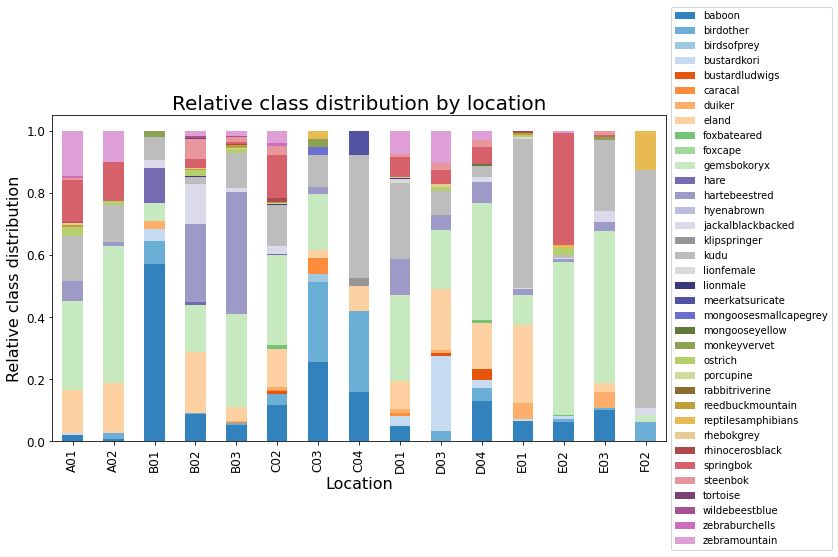

In [9]:
# Plot the distribution of animals at each camera location
utils.plot_bar_chart(meta_data)

### 3.3 Visualize images from one camera location

Run the next cell to plot examples of images taken from the same camera location. Each time you run this cell you'll see a new set of exammple images. Change the `camera_location` parameter to one of the other values listed in the plot above to see images from another location. 

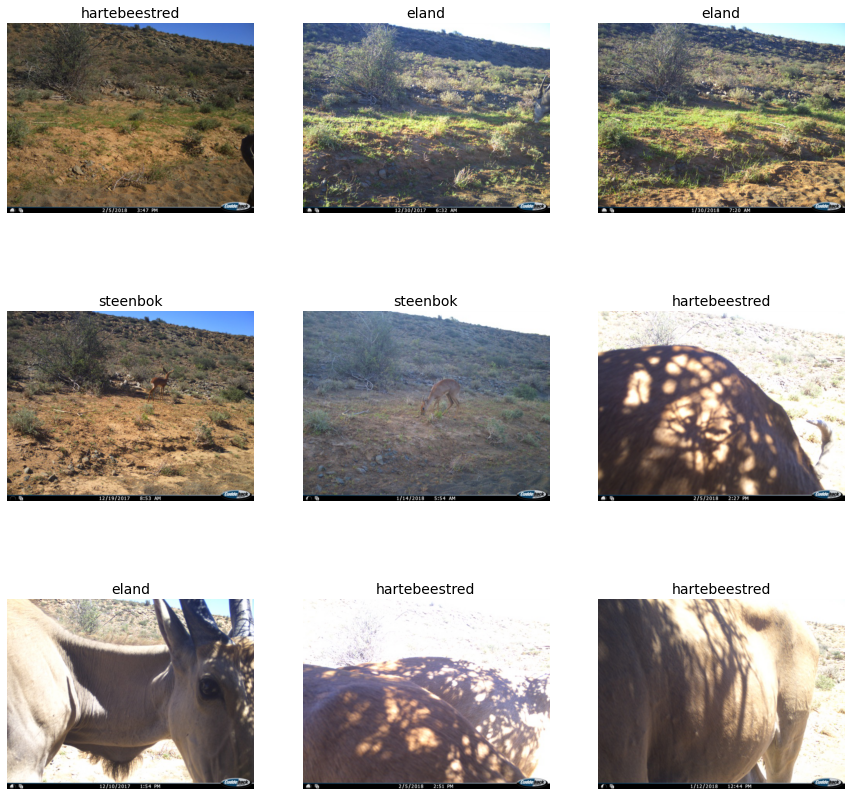

In [10]:
# Display a set of images from the same camera location
camera_location = 'B02'
utils.plot_random_images(meta_data, camera_location)

### 3.4 Visualize images from different camera locations

Run the next cell to plot examples of images taken from different camera locations. Each time you run this cell you'll see a new set of exammple images. 

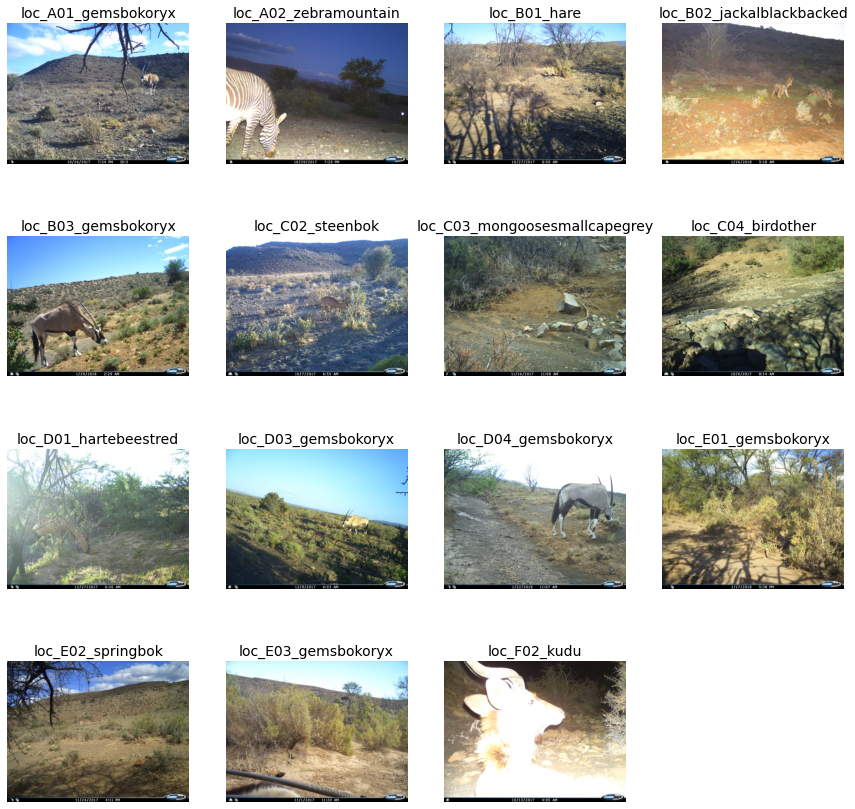

In [11]:
# Display a set of images, one from each camera location
utils.plot_images_from_all_locations(meta_data)

### 3.5 Inspect images that present challenges for classification

When the images are labeled in [zooniverse.org](https://www.zooniverse.org/projects/shuebner729/snapshot-karoo/classify), they are presented as sequences of 3 images. The 3 images correspond to a single capture, thus they "should" have the same label. However, sometimes in some of the images it is not possible to identify the animal, either because it is outside the field of view of the camera, or because it is hidden behind the bush or otherwise obscured from view, as in the following sequence, which is labeled as containing a baboon.

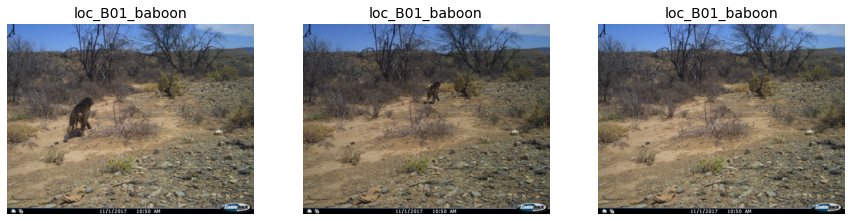

In [12]:
# Create a list of three examples that form a sequence
examples = ['data/baboon/KAR_S1_B01_R1_IMAG6738.JPG',
'data/baboon/KAR_S1_B01_R1_IMAG6737.JPG',
'data/baboon/KAR_S1_B01_R1_IMAG6736.JPG',]

# Plot the examples
utils.plot_examples(examples)

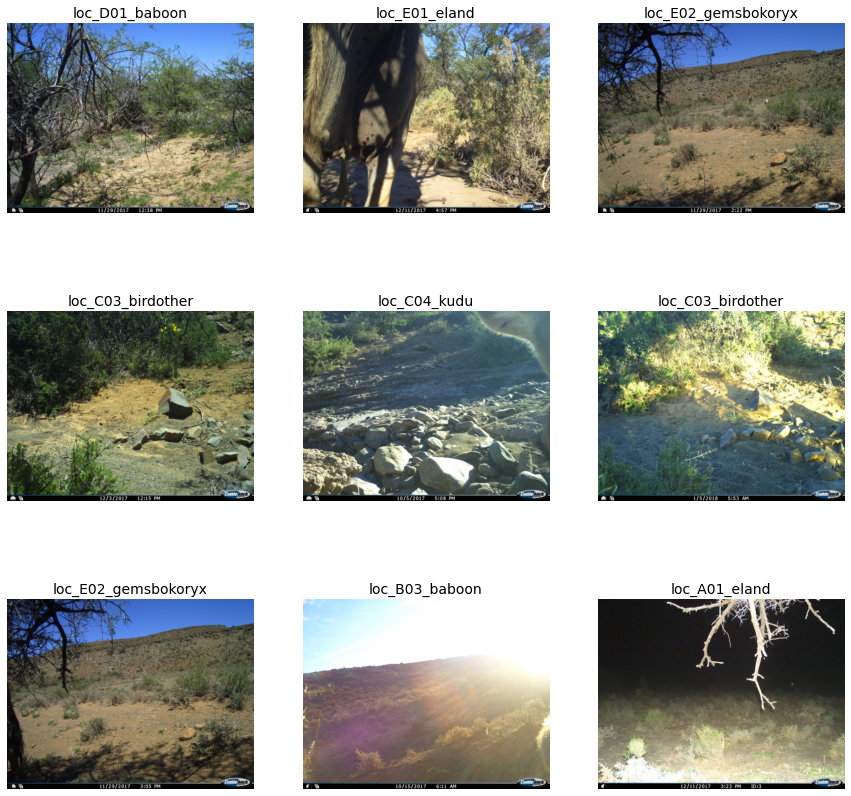

In [13]:
# Create a list of specific examples where the animals are hard to recognize
examples = ['data/baboon/KAR_S1_D01_R1_IMAG0158.JPG',
'data/eland/KAR_S1_E01_R1_IMAG0362.JPG',
'data/gemsbokoryx/KAR_S1_E02_R1_IMAG2502.JPG',
'data/birdother/KAR_S1_C03_R1_IMAG0361.JPG',
'data/kudu/KAR_S1_C04_R1_IMAG0833.JPG',
'data/birdother/KAR_S1_C03_R1_IMAG1214.JPG',
'data/gemsbokoryx/KAR_S1_E02_R1_IMAG2586.JPG',
'data/baboon/KAR_S1_B03_R1_IMAG0114.JPG',
'data/eland/KAR_S1_A01_R1_IMAG00129.JPG']

# Plot the examples
utils.plot_examples(examples)

## **Congratulations on finishing this lab!**

**Keep up the good work :)**